# Regresión múltiple: factores que afectan la descarga de publicaciones en repositorios académicos.

#### Variable Dependiente:

* Número de Descargas (num_descargas): Cantidad total de descargas de publicaciones en el repositorio.

#### Variables Independientes:

* Cantidad de Tipos de Documentos (tipos_documentos): Número de diferentes tipos de documentos disponibles en el repositorio (tesis, artículos, informes, etc.).
* Número de Áreas de Investigación (areas_investigacion): Cantidad de áreas de investigación que cubre la institución.
* Porcentaje de Estudiantes Bilingües (porcentaje_bilingues): Porcentaje de estudiantes que hablan más de un idioma.
* Acceso al Repositorio (acceso_abierto): Indica si el repositorio es de acceso abierto (1) o restringido (0).

#### Variable Independiente Principal: 
* Esfuerzo de Difusión Digital (esfuerzo_difusion): Representa la intensidad de las campañas de marketing y difusión en línea para promover el repositorio. Se mide en una escala de 1 a 100.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Establecer la semilla para reproducibilidad
np.random.seed(42)

# Número de instituciones a simular
n_instituciones = 100

# Generar datos para las variables independientes
tipos_documentos = np.random.randint(3, 15, n_instituciones)
areas_investigacion = np.random.randint(5, 30, n_instituciones)
porcentaje_bilingues = np.random.uniform(10, 90, n_instituciones)
acceso_abierto = np.random.choice([0, 1], n_instituciones, p=[0.3, 0.7])  # 70% acceso abierto
esfuerzo_difusion = np.random.uniform(10, 100, n_instituciones)

# Generar el número de descargas mensuales en el orden de miles, con mayor influencia de Esfuerzo de Difusión
num_descargas = np.round(
    1000 * (50 * acceso_abierto +               # El acceso abierto agrega 50 descargas
    2 * tipos_documentos +                      # Cada tipo de documento agrega 2 descargas
    1.5 * areas_investigacion +                 # Cada área de investigación agrega 1.5 descargas
    0.5 * porcentaje_bilingues +                # Cada punto porcentual de estudiantes bilingües agrega 0.5 descargas
    18 * (esfuerzo_difusion / 10) +             # Incrementar la influencia de Esfuerzo de Difusión para mayor correlación
    np.random.normal(0, 10, n_instituciones)    # Término aleatorio
)).astype(int)  # Convertir a número entero

# Crear una columna de identificación única para cada institución
instituciones = [f"Universidad_{i+1}" for i in range(n_instituciones)]

# Crear el DataFrame con todas las variables
df_repositorios = pd.DataFrame({
    'Institucion': instituciones,
    'Num_Descargas_Mensuales': num_descargas,
    'Tipos_Documentos': tipos_documentos,
    'Areas_Investigacion': areas_investigacion,
    'Porcentaje_Bilingues': porcentaje_bilingues,
    'Acceso_Abierto': acceso_abierto,
    'Esfuerzo_Difusion': esfuerzo_difusion
})

# Mostrar las primeras filas del DataFrame
df_repositorios


,Institucion,Num_Descargas_Mensuales,Tipos_Documentos,Areas_Investigacion,Porcentaje_Bilingues,Acceso_Abierto,Esfuerzo_Difusion
0,Universidad_1,188645,9,29,27.501138,1,38.027198
1,Universidad_2,268937,6,11,54.648160,1,98.155948
2,Universidad_3,147240,13,13,42.306894,1,25.779724
3,Universidad_4,91166,10,28,15.191380,0,11.544499
4,Universidad_5,238929,7,5,30.313233,1,78.702798
...,...,...,...,...,...,...,...
95,Universidad_96,222857,14,14,38.006273,0,71.922701
96,Universidad_97,250360,14,16,61.608269,0,85.326749
97,Universidad_98,306291,14,28,63.513925,1,88.018183
98,Universidad_99,255397,11,19,79.133405,0,85.463269


In [7]:
df_repositorios.to_csv('df_repositorios.csv', index=False)

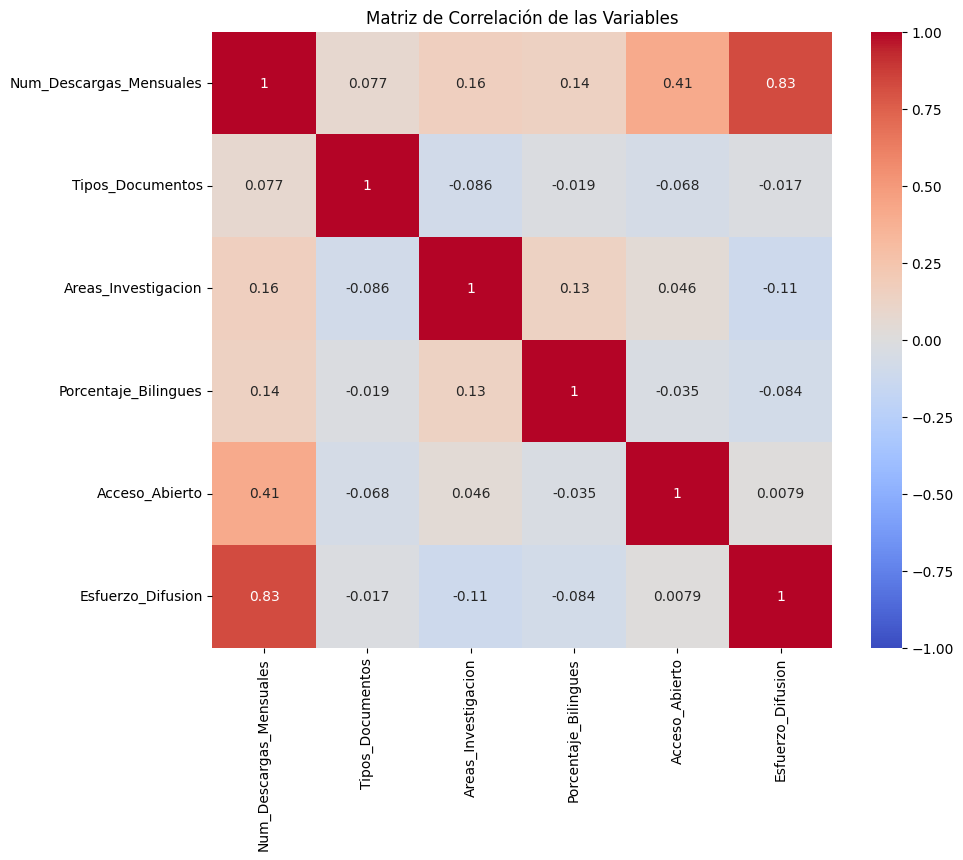

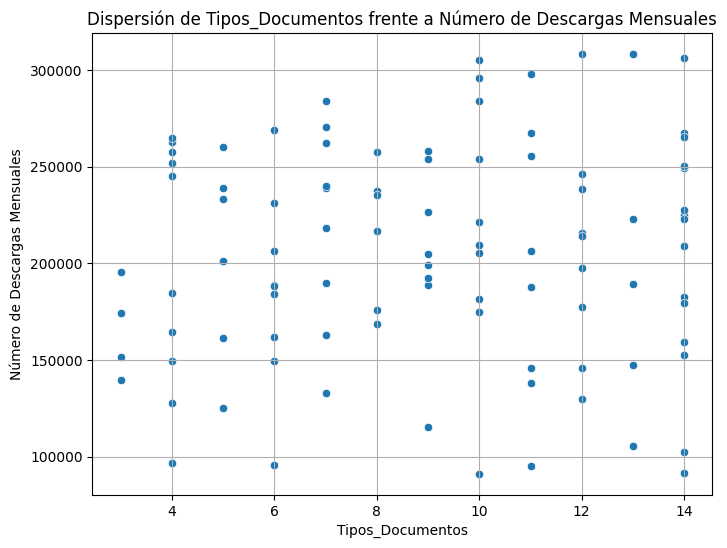

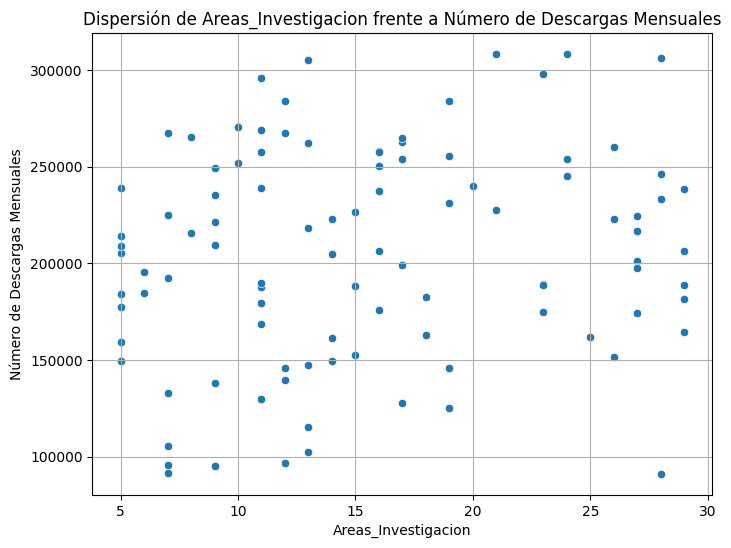

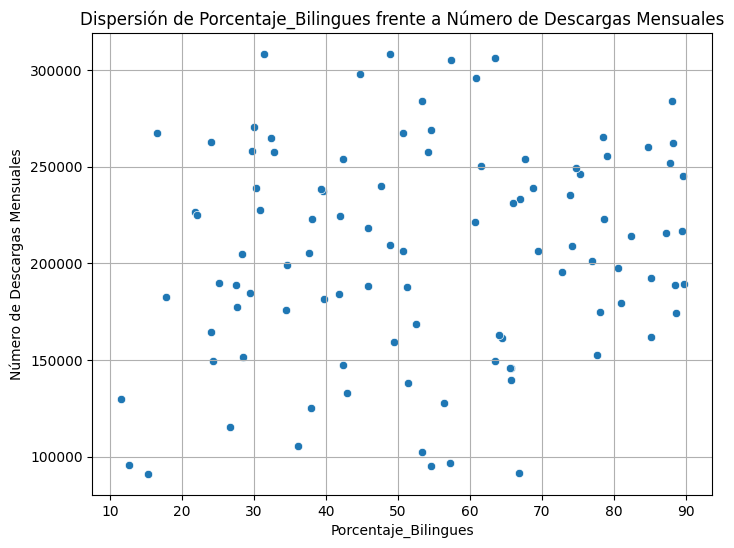

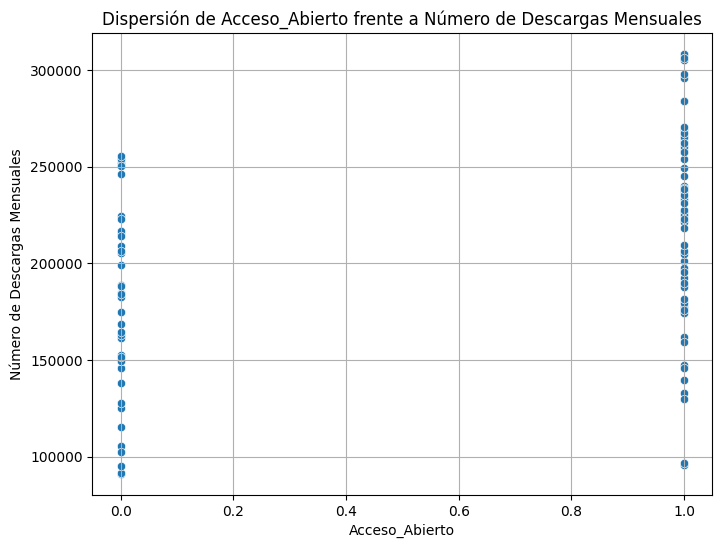

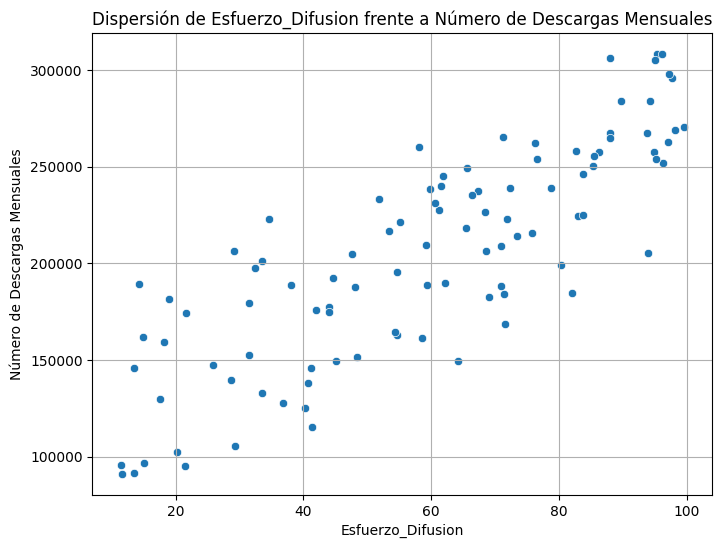

In [8]:
# Excluir la columna 'Institucion' que es de tipo string antes de calcular la matriz de correlación y los gráficos
df_repositorios_numerico = df_repositorios.drop(columns=['Institucion'])

# Gráfico de correlación
plt.figure(figsize=(10, 8))
plt.title("Matriz de Correlación de las Variables")
sns.heatmap(df_repositorios_numerico.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

# Graficos de dispersión para todas las variables independientes frente al número de descargas
independent_vars = ['Tipos_Documentos', 'Areas_Investigacion', 'Porcentaje_Bilingues', 'Acceso_Abierto', 'Esfuerzo_Difusion']

# Crear gráficos de dispersión
for var in independent_vars:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_repositorios_numerico, x=var, y='Num_Descargas_Mensuales')
    plt.title(f'Dispersión de {var} frente a Número de Descargas Mensuales')
    plt.xlabel(var)
    plt.ylabel('Número de Descargas Mensuales')
    plt.grid(True)
    plt.show()
